In [1]:
import numpy as np

In [2]:
!pip install zopfli

In [4]:
s = 'Hello World'
print(decompress(compress(s)))

b'Hello World'


In [5]:
print(compress(s))

b'x\xda\xf3H\xcd\xc9\xc9W\x08\xcf/\xcaI\x01\x00\x18\x0b\x04\x1d'


In [6]:
type(compress(s))

bytes

In [8]:
obj = compress(s)


In [9]:
type(obj)

bytes

In [10]:
decompress()

TypeError: decompress() takes at least 1 positional arguments (0 given)

In [44]:
getCompressionFromSong(song)

Percentage compression in the song is : 
96.6692789968652


# Code Implementation

In [102]:
from zopfli.zlib import compress
from zlib import decompress
import sys
import os
import pandas as pd
import seaborn as sns
import numpy as np

In [31]:
f1 = open('C:/Users/ashis/Desktop/Zopfli/cheapthrills.txt','r')
song = f1.read()
f1.close()
# print(song)

f1 = open('C:/Users/ashis/Desktop/Zopfli/tujheKitnaChahneLageHum.txt','r')
song = f1.read()
f1.close()
# print(song)

f1 = open('C:/Users/ashis/Desktop/Zopfli/tomTomClub.txt','r')
song = f1.read()
f1.close()
# print(song)

f1 = open('C:/Users/ashis/Desktop/Zopfli/aroundTheWorld.txt','r')
song = f1.read()
f1.close()

In [67]:
# access directory in python
# get file name, open file
# for each lyrics + the year: 


def getCompressionFromSong(song):
    compress_size = sys.getsizeof(compress(song))
    uncomressed_song_size = sys.getsizeof(song.encode())
    compression = (100-(compress_size/uncomressed_song_size)*100)
    return compression

# also try and read the byte code being actually saved in the compressed file

In [ ]:
songsDF = pd.DataFrame()

In [27]:
baseDirectory = "C:/Users/ashis/Desktop/Zopfli/Songs/"

dataset = []

#create dataset in python
for year in os.listdir(baseDirectory):
    yearSongs = os.listdir(baseDirectory+year+"/")
    for song in yearSongs:
        songFile = baseDirectory+year+"/"+song
        f= open(songFile)
        lyrics = f.read()
#         print(year , lyrics)
        yearLyrics = []
        yearLyrics.append(year)
        yearLyrics.append(song)
        yearLyrics.append(lyrics)
        dataset.append(yearLyrics)
        f.close()
        
print(dataset)

[['1995', 'DheereDheereAapMere.txt', 'Dhire dhire ap mere dil ke mehma ho gaye\nDhire dhire ap mere dil ke mehma ho gaye\nPahle jaa phir jane jaa phir jane jana ho gaye\n\n\nDhire dhire ap mere dil ke mehma ho gaye\nDhire dhire ap mere dil ke mehma ho gaye\nPahle jaa phi jane jaa phir jane jana ho gaye\nDhire dhire ap mere dil ke mehma ho gaye\n\n\nYe hai karam apk tumne mujhe chun liya\nAb chahae kuch na kaho hamne sab sun liya\nPahle jaa phir jane jaa phir jane jana ho gaye\nDhire dhire ap mere dil ke mehma ho gaye\nDhire dhire ap mere dil ke mehma ho gaye\n\n\nPagal jawani teri katil tumhari ada\nAisa chada dono pe ashiki ka nasha\nPahle jaa phir jane jaa phir jane jana ho gaye\nDhire dhire ap mere dil ke mehma ho gaye\nDhire dhire ap mere dil ke mehma ho gaye\nPahle jaa phi jane jaa phir jane jana ho gaye.\n\n'], ['1995', 'HoGayaHTujkoJoPyar.txt', 'Na jaane mere\nDil ko kya ho gaya\nAbhi to yahin\nTha abhi\nKho gaya\n\nNa jaane mere\nDil ko kya ho gaya\nAbhi to yahin\nTha abhi\nKho

In [57]:
df = pd.DataFrame(dataset, columns = ["year", "SongName", "Lyrics"])
        
# (os.listdir("C:/Users/ashis/Desktop/Zopfli/Songs/"))

In [108]:
# get compression and average compression for the year
# plot all the compressions on a seaborn plot
# Plot yearwise average compressions on the plot
averageCompressionYearWiseData = []
for x in df.year.unique():
    # get all songs with year == x
    yearLyrics = list(df[df.year == x].Lyrics)
    sumCompressions = int(0)
    countSongsInYear = len(yearLyrics)
    songIndex = 0 
    songNames = list(df[df.year == x].SongName)
    for lyrics in yearLyrics:
        compression = getCompressionFromSong(lyrics)
        sumCompressions+=compression
        print("Compression for songName ",songNames[songIndex], " is : ")
        print(compression)
        songIndex+=1
    
    averageCompression = sumCompressions/countSongsInYear
    print("-------- Average compression for year ", x, " is : ", averageCompression)
    print("")
    print("")
    print("")
    print("")
    averageCompressionYearWiseData .append([int(x),averageCompression])


Compression for songName  DheereDheereAapMere.txt  is : 
72.83018867924528
Compression for songName  HoGayaHTujkoJoPyar.txt  is : 
70.91795288383427
Compression for songName  HumkoSirfTumse.txt  is : 
69.58904109589041
Compression for songName  KehnaHiKya.txt  is : 
75.04019292604502
Compression for songName  TujheDekhaToYe.txt  is : 
65.83407671721677
-------- Average compression for year  1995  is :  70.84229046044635




Compression for songName  AapKaAanaDilDhadkana.txt  is : 
74.04534606205252
Compression for songName  ChoriChoriSapnoMein.txt  is : 
65.66791510611736
Compression for songName  Deewane.txt  is : 
59.909909909909906
Compression for songName  DilToteToteHoGaya.txt  is : 
72.52228631358155
Compression for songName  HumkoHumiSeChuraLo.txt  is : 
71.92857142857143
-------- Average compression for year  2000  is :  68.81480576404655




Compression for songName  AashiqBanayaApne.txt  is : 
76.58450704225352
Compression for songName  DheereJalna.txt  is : 
61.7547806524184

In [109]:
# list(df[df.year == '2019'].Lyrics)
yearLyrics = list(df[df.year == '2019'].Lyrics)
len(yearLyrics)
# for lyrics in list(df[df.year == '2019'].Lyrics):
#     print(lyrics)

5

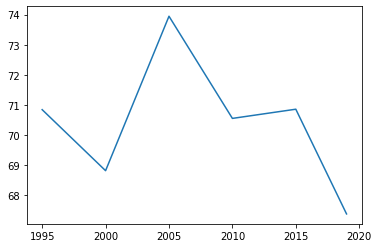

In [112]:
sns.lineplot(np.array(averageCompressionYearWiseData)[:,0], np.array(averageCompressionYearWiseData)[:,1])

In [107]:
np.array(averageCompressionYearWiseData)[:,0]

array(['1995', '2000', '2005', '2010', '2015', '2019'], dtype='<U17')